In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

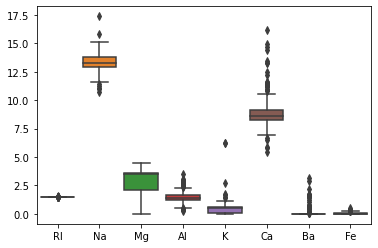

In [235]:
sns.boxplot(data=df[['RI','Na','Mg','Al','K','Ca','Ba','Fe']])

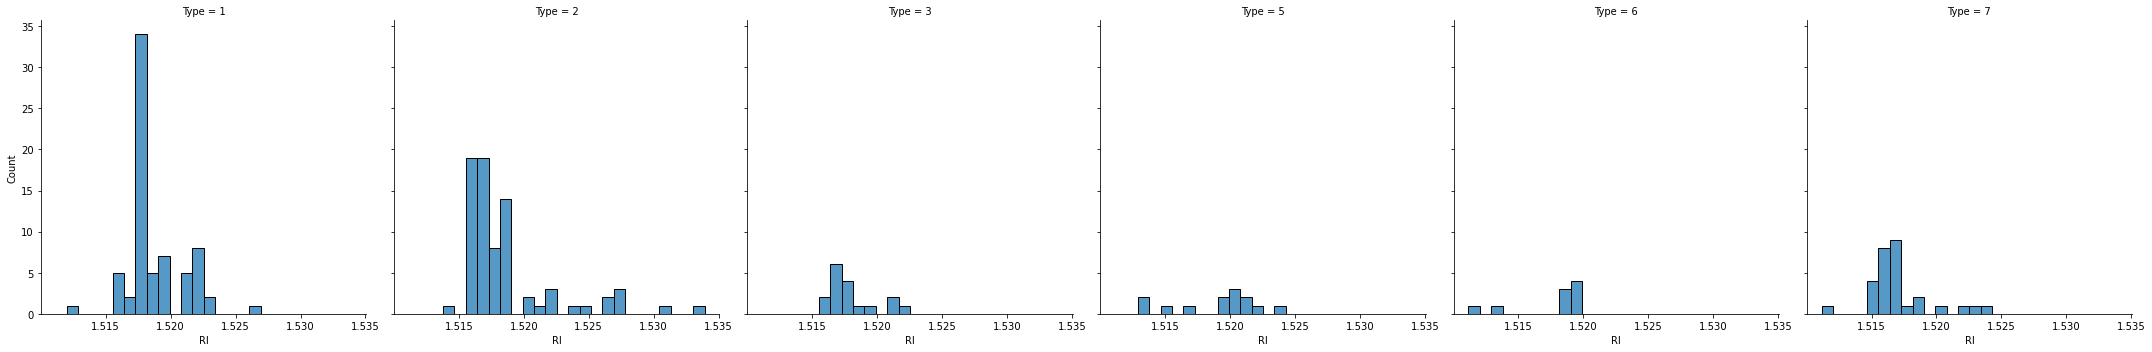

In [64]:
sns.displot(data=df, x=df['RI'],  col="Type")

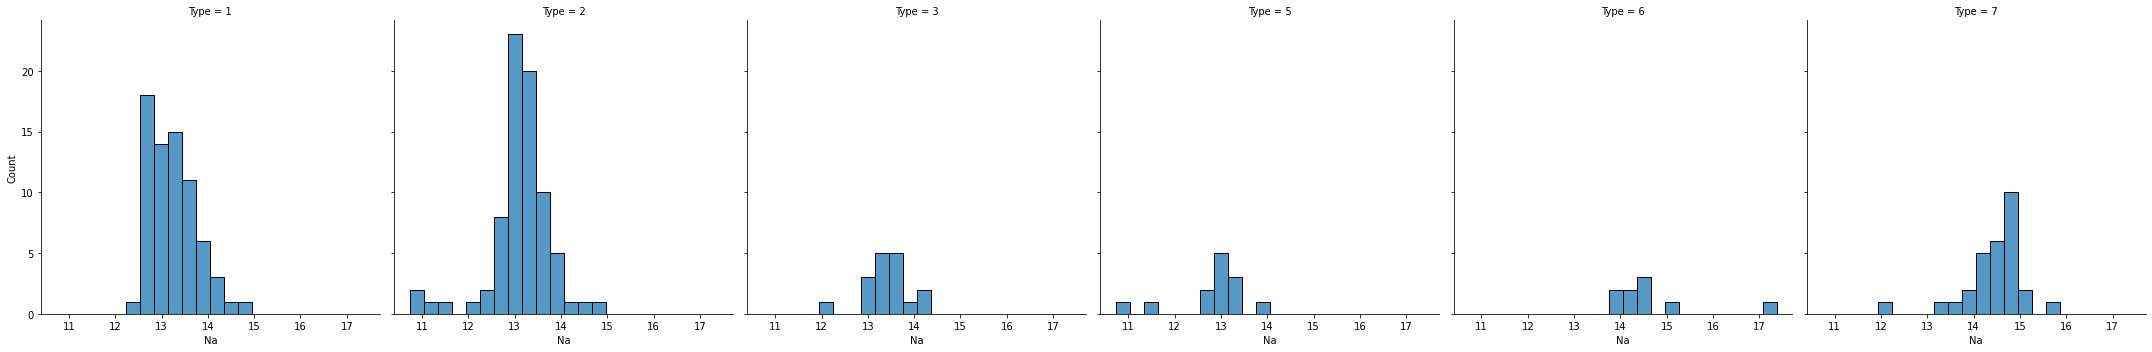

In [65]:
sns.displot(data=df, x=df['Na'],  col="Type")

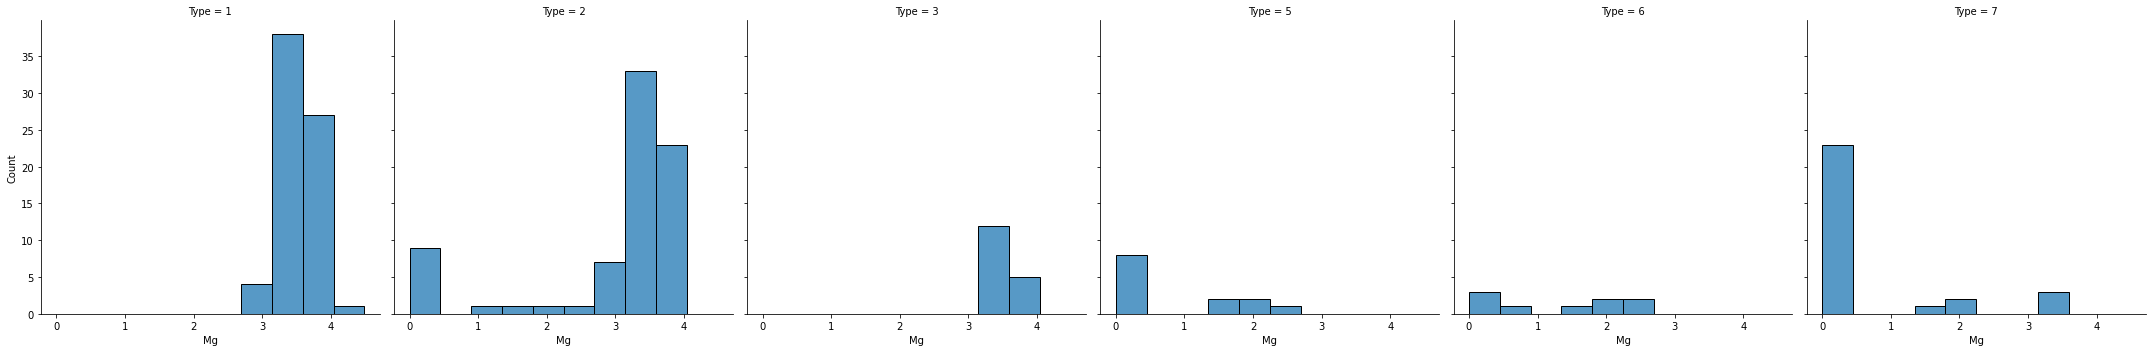

In [66]:
sns.displot(data=df, x=df['Mg'],  col="Type")

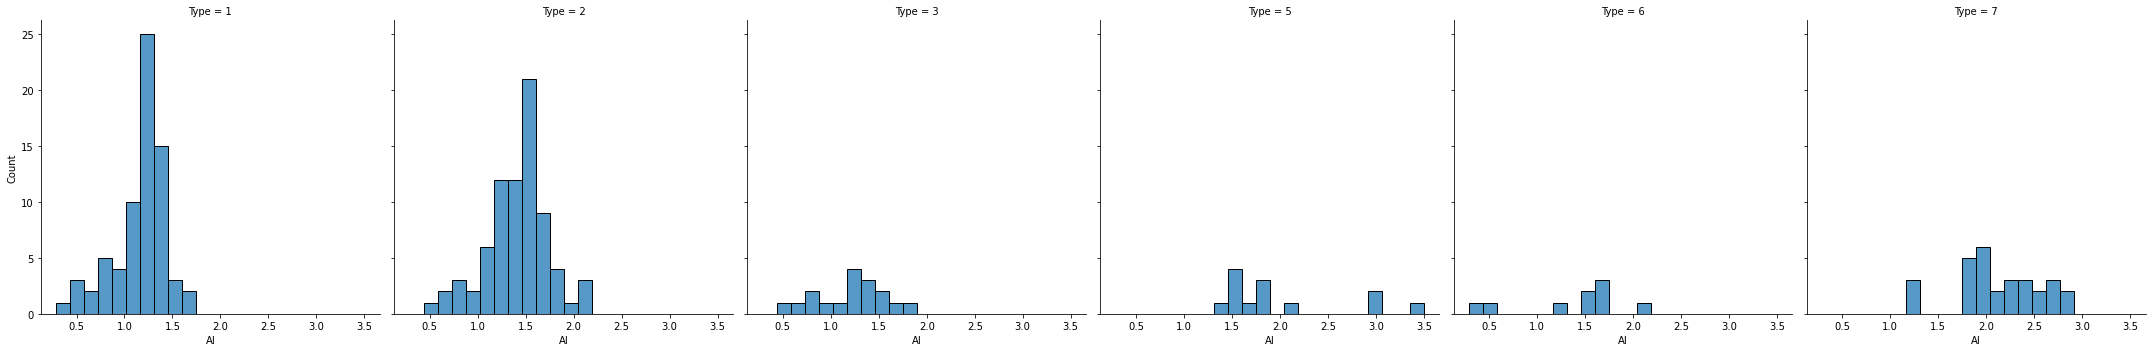

In [67]:

sns.displot(data=df, x=df['Al'],  col="Type")

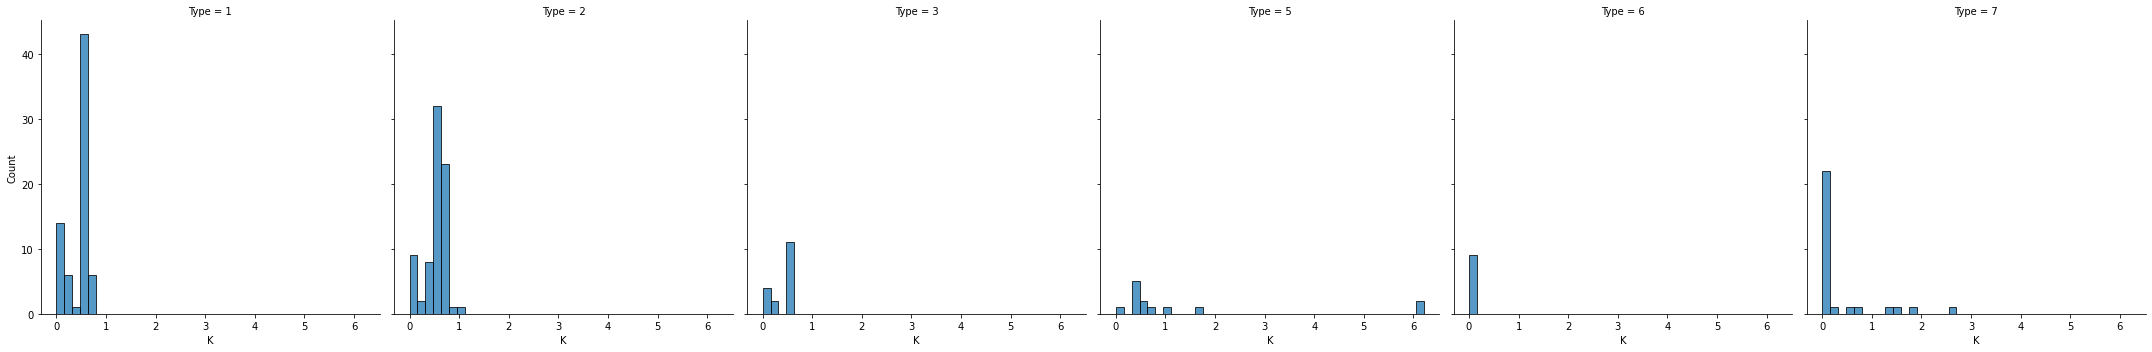

In [68]:
sns.displot(data=df, x=df['K'],  col="Type")

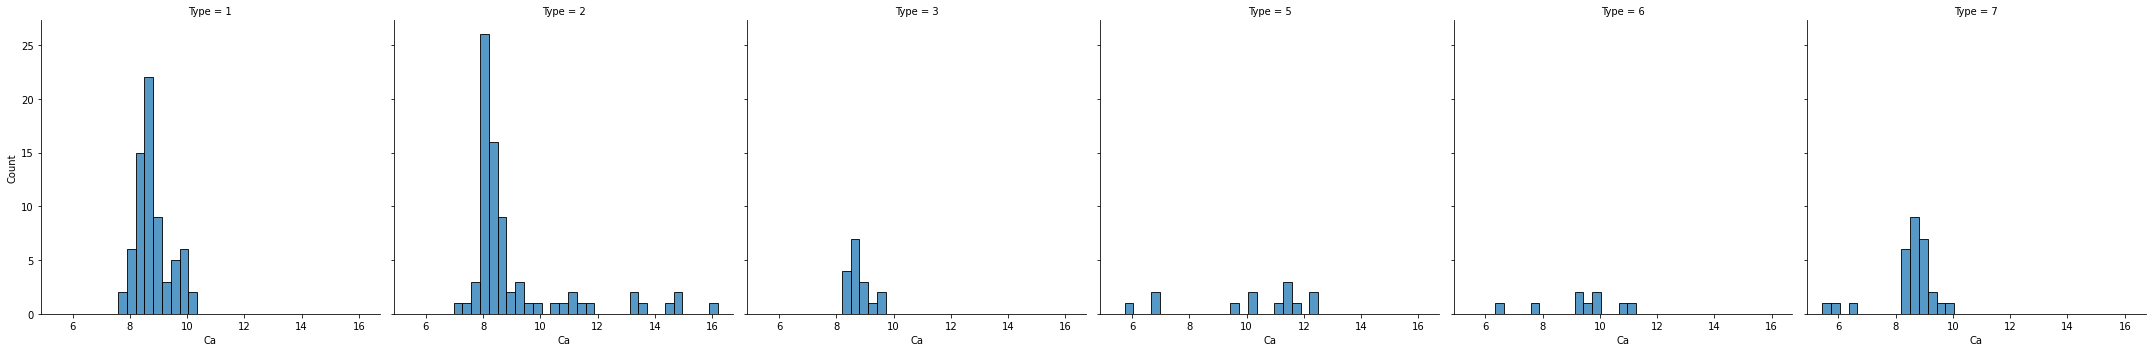

In [69]:
sns.displot(data=df, x=df['Ca'],  col="Type")

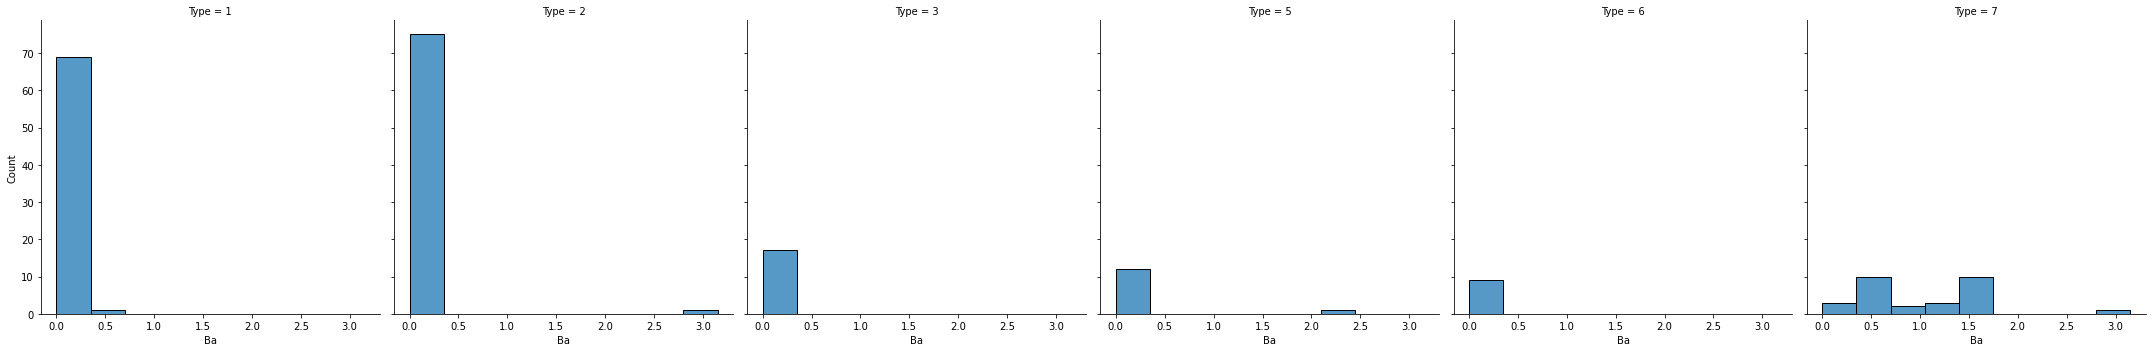

In [70]:
sns.displot(data=df, x=df['Ba'],  col="Type")

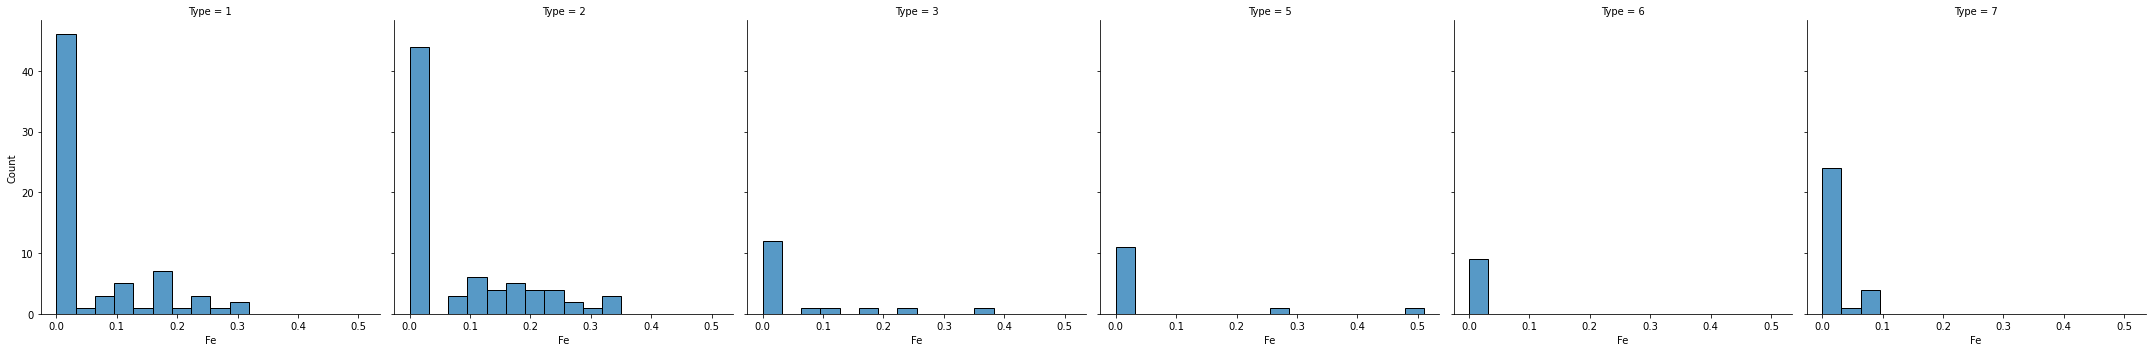

In [71]:
sns.displot(data=df, x=df['Fe'],  col="Type")

#### Нормальное распределение у алюминия типа 1 и 2

In [8]:
df.isnull().sum().sum() # пустых значений нет

0

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [10]:
X = df[['RI','Na','Mg','Al','K','Ca','Ba','Fe', 'Si']]
y = df[['Type']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier()


In [13]:
model.fit(X_train, y_train)

C:\Users\spass\AppData\Local\Temp/ipykernel_15264/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.8372093023255814

In [265]:
df_filtered = df[(df['Na']<15) & (df['Na']>12.5)]

In [266]:
df_filtered.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.518140,13.462222,2.812475,1.447273,72.636212,0.496465,8.809646,0.158939,0.054848,2.691919
std,0.002497,0.618966,1.373621,0.494010,0.676861,0.653783,1.125553,0.455045,0.094395,2.067647
min,1.511310,12.550000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516528,12.990000,2.772500,1.190000,72.280000,0.132500,8.220000,0.000000,0.000000,1.000000
50%,1.517670,13.330000,3.495000,1.365000,72.760000,0.555000,8.575000,0.000000,0.000000,2.000000
75%,1.519050,13.825000,3.610000,1.627500,73.067500,0.610000,9.117500,0.000000,0.097500,3.000000
max,1.527770,14.990000,4.490000,3.500000,74.550000,6.210000,14.400000,2.880000,0.510000,7.000000


In [267]:
df_count = df.groupby('Type')['RI'].count().reset_index().rename(columns={'RI': 'count_initial'})

In [268]:
df_count_new_1 = df_filtered.groupby('Type')['RI'].count().reset_index().rename(columns={'RI': 'count_newl'})

In [269]:
rows_check = pd.merge(df_count,df_count_new_1, on='Type', how='left')

In [270]:
rows_check['diff'] = round(rows_check['count_newl']/rows_check['count_initial']*100-100,2)

In [271]:
rows_check['share_init'] = rows_check['count_initial']/214
rows_check['share_new'] = rows_check['count_newl']/198

In [272]:
rows_check

,Type,count_initial,count_newl,diff,share_init,share_new
0,1,70,69,-1.43,0.327103,0.348485
1,2,76,69,-9.21,0.355140,0.348485
2,3,17,16,-5.88,0.079439,0.080808
3,5,13,11,-15.38,0.060748,0.055556
4,6,9,8,-11.11,0.042056,0.040404
5,7,29,25,-13.79,0.135514,0.126263


In [282]:
X_new = df_filtered[['RI','Na','Mg','Al','K','Ca','Ba','Fe', 'Si']]
y_new = df_filtered[['Type']]

In [283]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [284]:
model.fit(X_new_train, y_new_train)

C:\Users\spass\AppData\Local\Temp/ipykernel_15264/3818518079.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_new_train, y_new_train)


RandomForestClassifier()

In [285]:
y_pred_new = model.predict(X_new_test)
accuracy_score(y_new_test, y_pred_new)

0.925

После удаления выбросов по одному из показателей качество модели улучшилось сразу же улучшилось.
Но при одновременной фильтрации по всему сету качество падает, поэтому нужно выбирать выбросы внутри классов.